# Install and Import libraries

pip install opencv-python matplotlib numpy tensorflow

In [74]:
import os
import cv2                         #computer vision for processing images
import numpy as np                 #numpy array
import matplotlib.pyplot as plt    #visualisation of digits
import tensorflow as tf            #for ML 

# Preprocessing

In [75]:
mnist = tf.keras.datasets.mnist

In [92]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [93]:
x_train = tf.keras.utils.normalize(x_train, axis=1) #normalise the pixels between [0,1]
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Learning the model

In [94]:
model = tf.keras.models.Sequential()       #basic sequential model

In [95]:
#adding layers to a model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   #Flatten converts 2D grid into 1D grid of 28 x 28 elements

In [96]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [97]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [98]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))  #10 for the ten digits to classify

In [99]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2636 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1064 - accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0741 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0418 - accuracy: 0.9861


In [101]:
model.save('handwritten-digit-recogniser.model')

INFO:tensorflow:Assets written to: handwritten-digit-recogniser.model\assets


INFO:tensorflow:Assets written to: handwritten-digit-recogniser.model\assets


In [102]:
model = tf.keras.models.load_model('handwritten-digit-recogniser.model')

# Testing the model

In [103]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0970 - accuracy: 0.9716


In [104]:
print (loss, accuracy)

0.09697246551513672 0.9715999960899353


1/1 [==============================] - 0s 172ms/step
Predicting the digit to be a 9


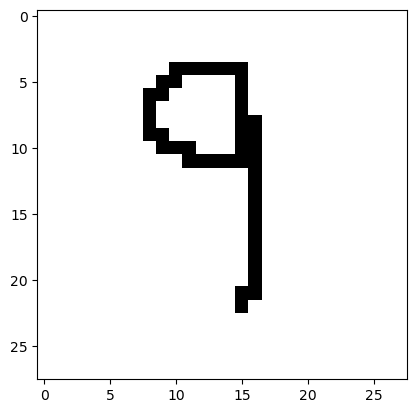

1/1 [==============================] - 0s 52ms/step
Predicting the digit to be a 8


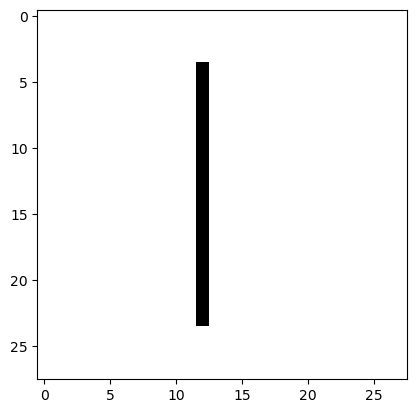

1/1 [==============================] - 0s 62ms/step
Predicting the digit to be a 6


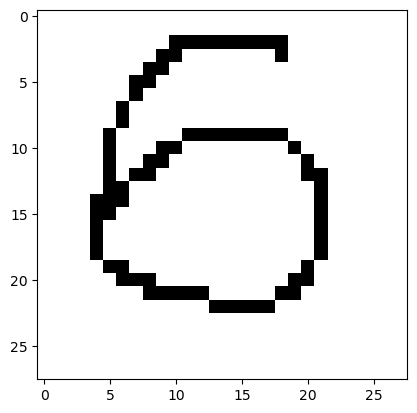

1/1 [==============================] - 0s 75ms/step
Predicting the digit to be a 2


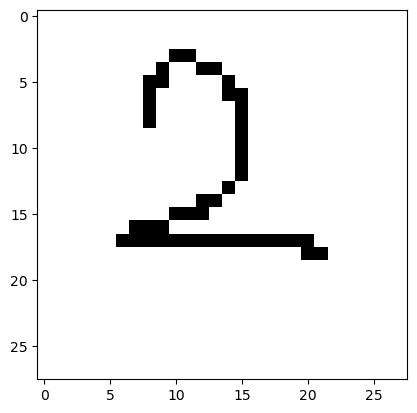

1/1 [==============================] - 0s 62ms/step
Predicting the digit to be a 6


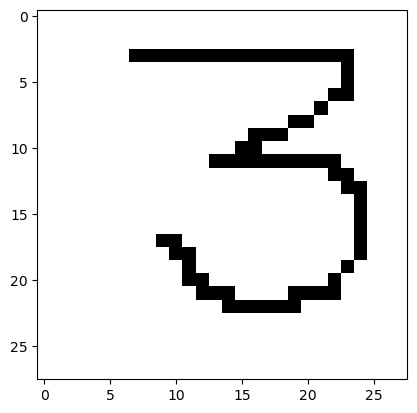

1/1 [==============================] - 0s 74ms/step
Predicting the digit to be a 3


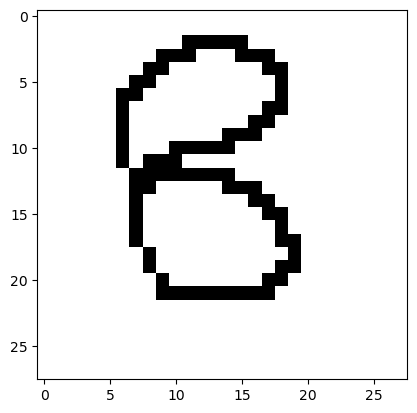

1/1 [==============================] - 0s 47ms/step
Predicting the digit to be a 0


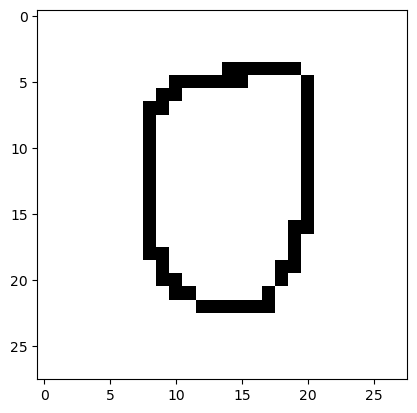

1/1 [==============================] - 0s 62ms/step
Predicting the digit to be a 2


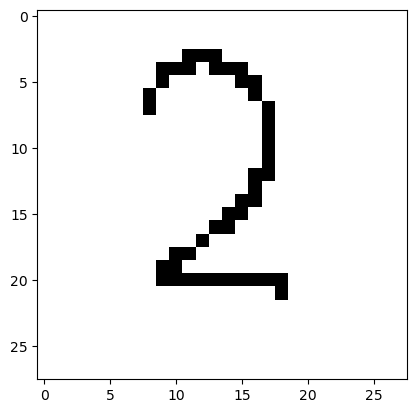

1/1 [==============================] - 0s 62ms/step
Predicting the digit to be a 2


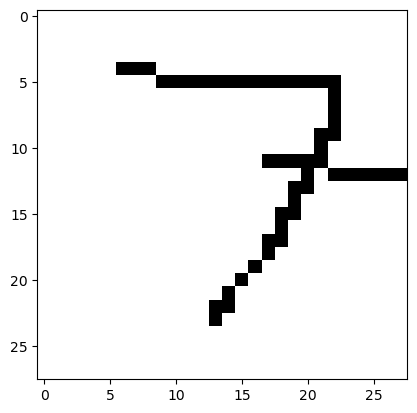

1/1 [==============================] - 0s 63ms/step
Predicting the digit to be a 4


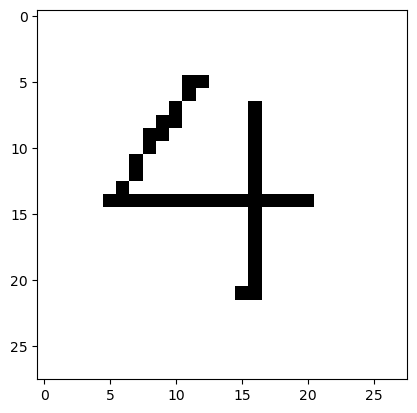

1/1 [==============================] - 0s 83ms/step
Predicting the digit to be a 5


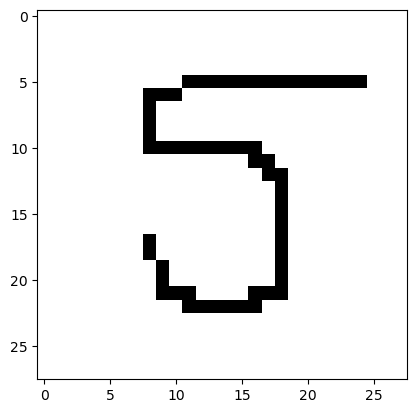

In [105]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        image = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        image = np.invert(np.array([image]))
        prediction = model.predict(image)
        print(f"Predicting the digit to be a {np.argmax(prediction)}")
        plt.imshow(image[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("ERROR")
    finally:
        image_number += 1
            